#Pré-Processamento de Imagens

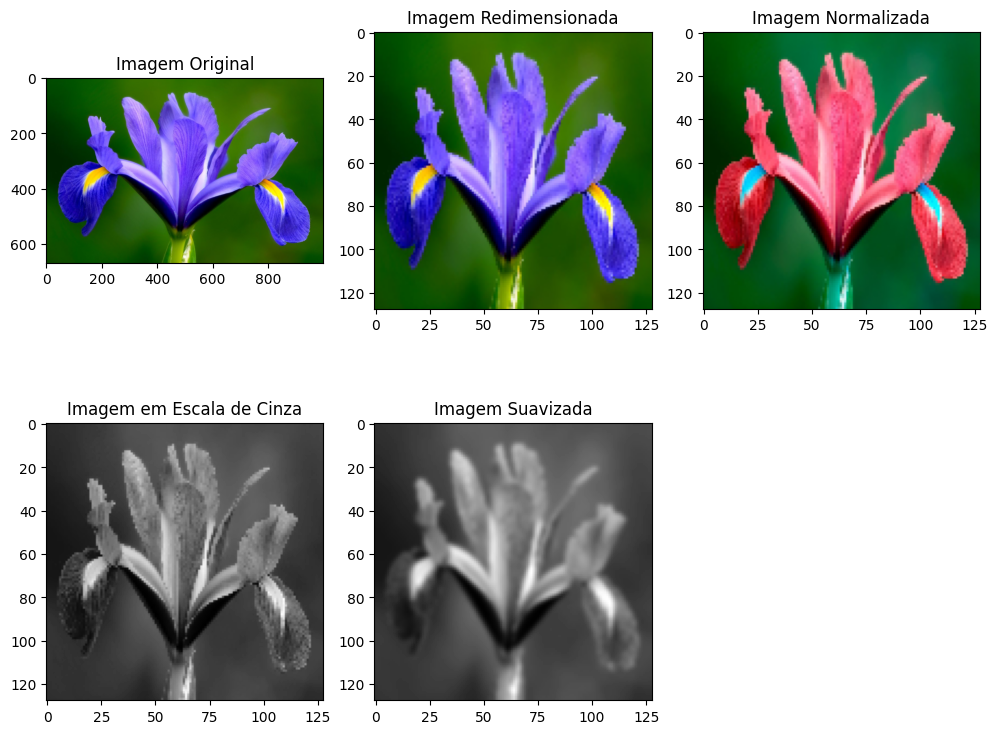

True

In [16]:
import cv2
import numpy as np
import requests
from matplotlib import pyplot as plt

# URL da imagem
image_url = 'https://blog.plantei.com.br/wp-content/uploads/2017/05/iris-foto-44.jpg'  # Substitua por um URL válido

# Fazer o download da imagem
response = requests.get(image_url)
if response.status_code != 200:
    raise ValueError("Não foi possível baixar a imagem. Verifique o URL.")

# Ler a imagem em um array numpy
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)

# Decodificar a imagem
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Verificar se a imagem foi carregada corretamente
if image is None:
    raise ValueError("A imagem não pôde ser carregada. Verifique o URL.")

# Redimensionar a imagem
resized_image = cv2.resize(image, (128, 128))

# Normalizar a imagem
normalized_image = resized_image / 255.0

# Converter para escala de cinza
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Aplicar um filtro de suavização (blur)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Mostrar as imagens em diferentes etapas do pré-processamento
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.title('Imagem Original')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 2)
plt.title('Imagem Redimensionada')
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 3)
plt.title('Imagem Normalizada')
plt.imshow(normalized_image)

plt.subplot(2, 3, 4)
plt.title('Imagem em Escala de Cinza')
plt.imshow(gray_image, cmap='gray')

plt.subplot(2, 3, 5)
plt.title('Imagem Suavizada')
plt.imshow(blurred_image, cmap='gray')

plt.tight_layout()
plt.show()

# Salvar a imagem suavizada
cv2.imwrite('imagem_suavizada.jpg', blurred_image)

#Segmentação de imagens

##Limiarização de Imagens com OpenCV

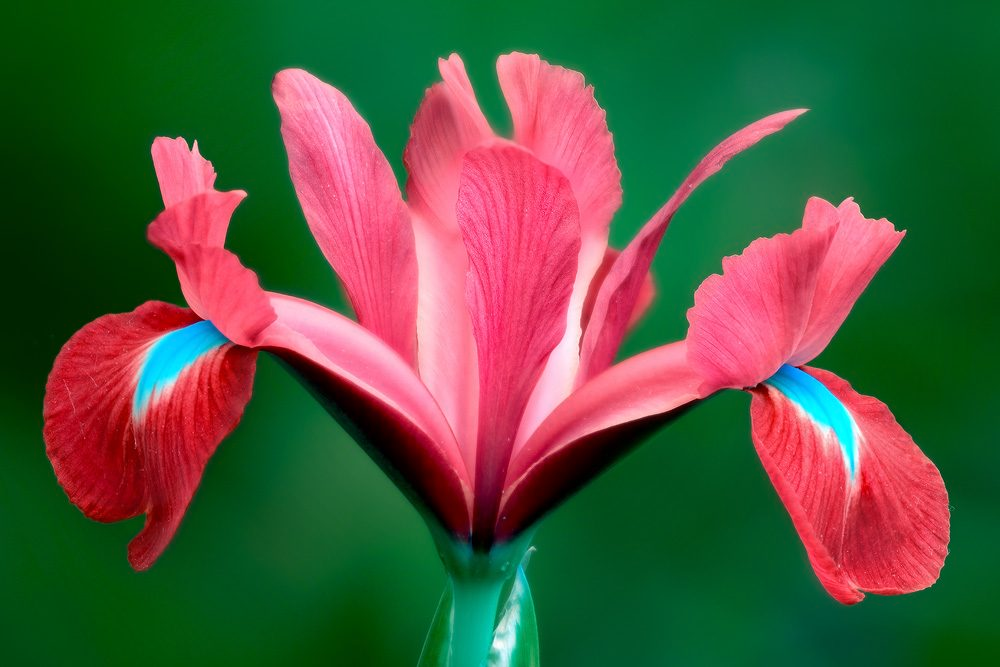

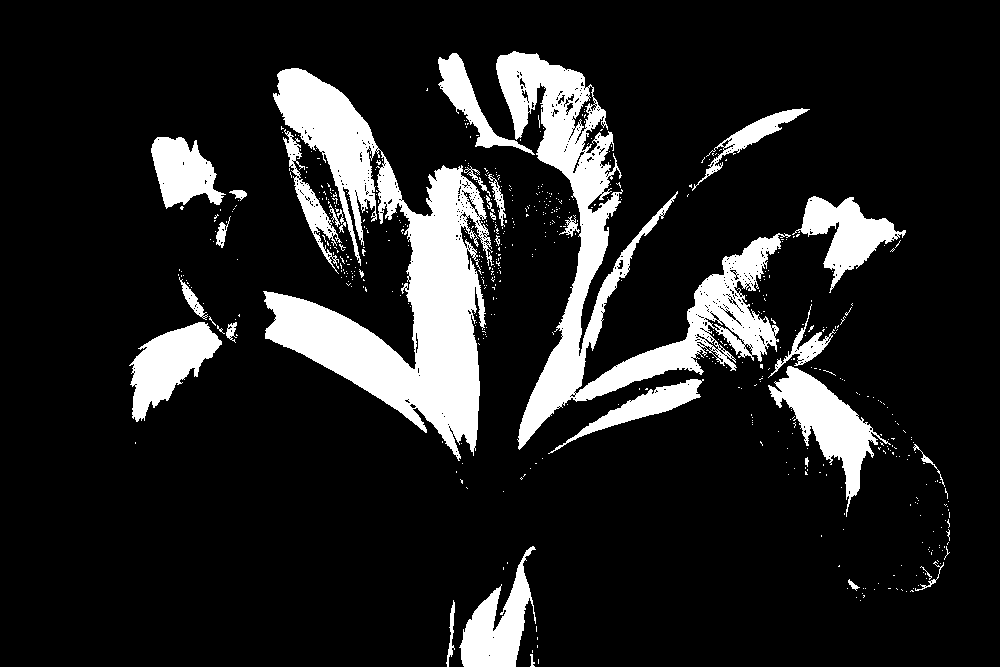

In [19]:
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO
from google.colab.patches import cv2_imshow

# Função para baixar a imagem a partir do URL
def download_image(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    return np.array(image)

# URL da imagem
image_url = 'https://blog.plantei.com.br/wp-content/uploads/2017/05/iris-foto-44.jpg'

# Carregar a imagem a partir do URL
image = download_image(image_url)

# Converter para tons de cinza se necessário
if len(image.shape) > 2:
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
else:
    gray_image = image

# Aplicar limiarização
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Exibir a imagem original e a imagem binarizada
cv2_imshow(image)
cv2_imshow(binary_image)

##Segmentação baseada em Regiões com Scikit-image

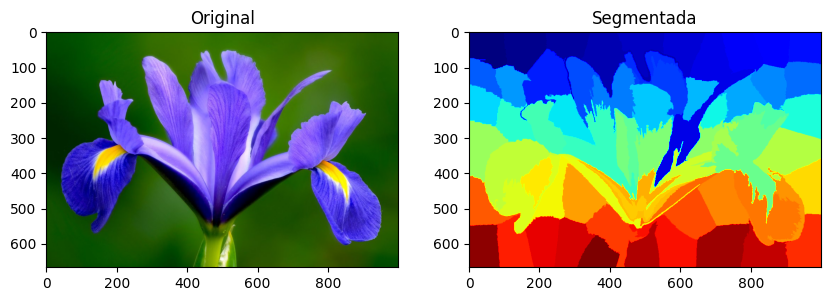

In [20]:
from skimage import io, segmentation
import matplotlib.pyplot as plt
import requests
from PIL import Image
import numpy as np
from io import BytesIO

# Função para baixar a imagem a partir do URL
def download_image(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    return np.array(image)

# URL da imagem
image_url = 'https://blog.plantei.com.br/wp-content/uploads/2017/05/iris-foto-44.jpg'

# Carregar a imagem a partir do URL
image = download_image(image_url)

# Aplicar segmentação baseada em regiões
segments = segmentation.slic(image, n_segments=100, compactness=10)

# Exibir a imagem original e a imagem segmentada
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original')
ax[1].imshow(segments, cmap='jet')
ax[1].set_title('Segmentada')
plt.show()

#Detecção/classificação de imagens

##Classificação de Imagens com TensorFlow

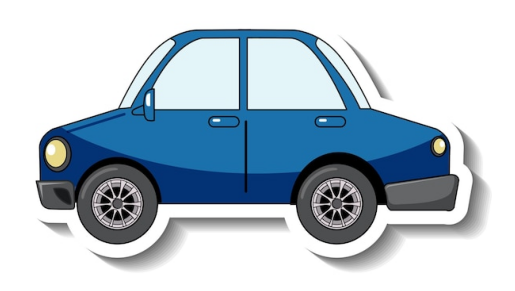

1/1 [==============================] - 1s 1s/step
Previsões:
pickup: 35.80%
cab: 10.53%
beach_wagon: 8.27%
minivan: 7.14%
car_wheel: 3.88%


In [45]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, imagenet_utils
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# URL da nova imagem
img_url = "https://img.freepik.com/vetores-gratis/modelo-de-adesivo-com-um-carro-azul-isolado_1308-66899.jpg"

# Baixar a imagem
response = requests.get(img_url)

# Abrir a imagem usando PIL
img = Image.open(BytesIO(response.content))

# Exibir a imagem
plt.imshow(img)
plt.axis('off')
plt.show()

# Converter a imagem para um array numpy
img_array = np.array(img.resize((224, 224)))

# Pré-processar a imagem
img_array = imagenet_utils.preprocess_input(img_array)

# Expandir as dimensões para corresponder ao formato esperado pelo modelo
img_array = np.expand_dims(img_array, axis=0)

# Carregar o modelo MobileNetV2 pré-treinado
model = MobileNetV2(weights='imagenet', input_shape=(224, 224, 3))

# Fazer a previsão
predictions = model.predict(img_array)

# Decodificar as previsões
decoded_predictions = imagenet_utils.decode_predictions(predictions)

# Exibir as previsões
print('Previsões:')
for pred in decoded_predictions[0]:
    print(f'{pred[1]}: {pred[2]*100:.2f}%')